In [1]:
import numpy as np
import pagn.constants as ct
import matplotlib.pyplot as plt
import pagn

import NT_disk_Eqns_V1 as jscript

#some nicer code based on Test_zone.ipynb

In [68]:
MBH_power=7

MBH=10**MBH_power * ct.MSun #in kgs
spin=0.9
alpha=0.1
eps=0.1
mdot=0.1 #in terms of Ledd

le=0.01
eps = 0.1

Rsch= 2*ct.G*MBH/ct.c**2

X=0.7
b=0
Opacity='combined'


#general scaling from Abramowicz and Fragile
M=MBH * ct.G /(ct.c*ct.c)
m=MBH/ct.MSun

R_G=ct.G*MBH*(1/(ct.c*ct.c))

In [69]:
# print(f'R_G = {R_G} m')

Rmin= jscript.R_isco_function(MBH, spin) #uses relativistic eqn for ISCO to set inner edge of disc
Rmax=1e7*R_G #for the sake of this quick maths it doesn't really matter what this is as long as its large 

r_isco=jscript.R_isco_function(MBH, spin)

steps=10000000

R=np.linspace(r_isco, Rmax, steps)

R_im=jscript.R_inner_mid(r_isco, MBH, mdot, alpha)
R_mo=jscript.R_mid_outer(r_isco, mdot)

print(R_im, R_mo, R/R_G)


50.196942104619474 212.8338975881627 [2.32088304e+00 3.32088291e+00 4.32088278e+00 ... 9.99999800e+06
 9.99999900e+06 1.00000000e+07]


In [70]:
Rs=[]
Rs_inner=[]
Rs_mid=[]
Rs_outer=[]

sigmas=[]
sigmas_inner=[]
sigmas_mid=[]
sigmas_outer=[]

Hs=[]
Hs_inner=[]
Hs_mid=[]
Hs_outer=[]

rho0s=[]
rho0s_inner=[]
rho0s_mid=[]
rho0s_outer=[]

rhos=[]

Ts=[]
Ts_inner=[]
Ts_mid=[]
Ts_outer=[]

betas=[]
taus=[]

flag=0
flag2=0
flag3=0

r_tr=0
r_rel=0
r_outer=0

inner_flag=0
mid_flag=0
outer_flag=0


for i in range(1, steps):
    r=R[i]
    y=np.sqrt(r/M)
    rstar=(r/M)

    if rstar<R_im:
        if inner_flag==0:
            print(f'disk in inner region')
            inner_flag=1
        rho_0=jscript.rho_0_NT(r, MBH, spin, mdot, alpha)
        T=jscript.T_NT(r, MBH, spin, mdot, alpha)
        # H=jscript.H_NT(r, MBH, spin, mdot)
        H=jscript.H_NT_2(r, MBH, spin, mdot)
        sigma=jscript.Sigma_NT(r, MBH, spin, mdot, alpha)

        sigmas_inner.append(sigma)
        Ts_inner.append(T)
        Hs_inner.append(H)
        rho0s_inner.append(rho_0)

        Rs_inner.append(rstar)
    
    if R_im<=rstar<R_mo:
        if mid_flag==0:
            print(f'disk transitioned to middle region at {rstar} Rg')
            mid_flag=1
        rho_0=jscript.rho_0_NT_Middle(r, MBH, spin, mdot, alpha)
        T=jscript.T_NT_Middle(r, MBH, spin, mdot, alpha)
        H=jscript.H_NT_Middle(r, MBH, spin, mdot, alpha)
        sigma=jscript.Sigma_NT_Middle(r, MBH, spin, mdot, alpha)

        sigmas_mid.append(sigma)
        Ts_mid.append(T)
        Hs_mid.append(H)
        rho0s_mid.append(rho_0)

        Rs_mid.append(rstar)
    
    if R_mo<rstar:
        if outer_flag==0:
            print(f'disk transtitioned to outer region at {rstar} Rg')
            outer_flag=1
        rho_0=jscript.rho_0_NT_Outer(r, MBH, spin, mdot, alpha)
        T=jscript.T_NT_Outer(r, MBH, spin, mdot, alpha)
        H=jscript.H_NT_Outer(r, MBH, spin, mdot, alpha)
        sigma=jscript.Sigma_NT_Outer(r, MBH, spin, mdot, alpha)

        sigmas_outer.append(sigma)
        Ts_outer.append(T)
        Hs_outer.append(H)
        rho0s_outer.append(rho_0)

        Rs_outer.append(rstar)
    
    sigmas.append(sigma)
    Ts.append(T)
    Hs.append(H)
    rho0s.append(rho_0)
    Rs.append(rstar)

    rho=sigma/(2*H)
    rhos.append(rho)

    omega=np.sqrt(ct.G * MBH / (r*r*r))

    v=omega * r
    vc=v/ct.c

    Qt= omega*omega / (2 * np.pi * ct.G * rho)

    if vc<0.1 and flag==0:
        print(f'disk stops being relativistic at {r/R_G} R_G')
        r_rel=r
        flag+=1
    
    if Qt<=1 and flag3==0:
        print(f'disk transitions to outer region at {r/R_G} R_G')
        r_outer=r
        flag3+=1

disk = pagn.SirkoAGN(Mbh=MBH, alpha=alpha, le= le, eps=eps)
Rmin = disk.Rmin
Rmax = disk.Rmax
disk.solve_disk()

Sigma = 2*disk.rho*disk.h

disk in inner region
disk transitioned to middle region at 50.32087670152265 Rg
disk stops being relativistic at 100.32087009710678 R_G
disk transtitioned to outer region at 213.3208551711269 Rg
### Sirko & Goodman 2003 parameters ###
Mbh = 1.000000e+07 MSun
Mdot = 2.596689e-03 MSun/yr
le = 0.01
Rs = 9.570121e-07 pc
Rmin = 2.500000e+00 Rs
Rmax = 1.000000e+07 Rs, 9.570121e+00 pc
alpha = 0.1
b = 0
eps = 0.1
X = 0.7
Opacity = combined

debug = False
xtol = 1e-10
root method = lm
Q<1 at i=5179 (R=1.00e+04 Rs)
Beginning star formation at index 5179
Mdisk = 1934601.164096946 Msun
Mdisk/Mbh = 0.1934601164096946


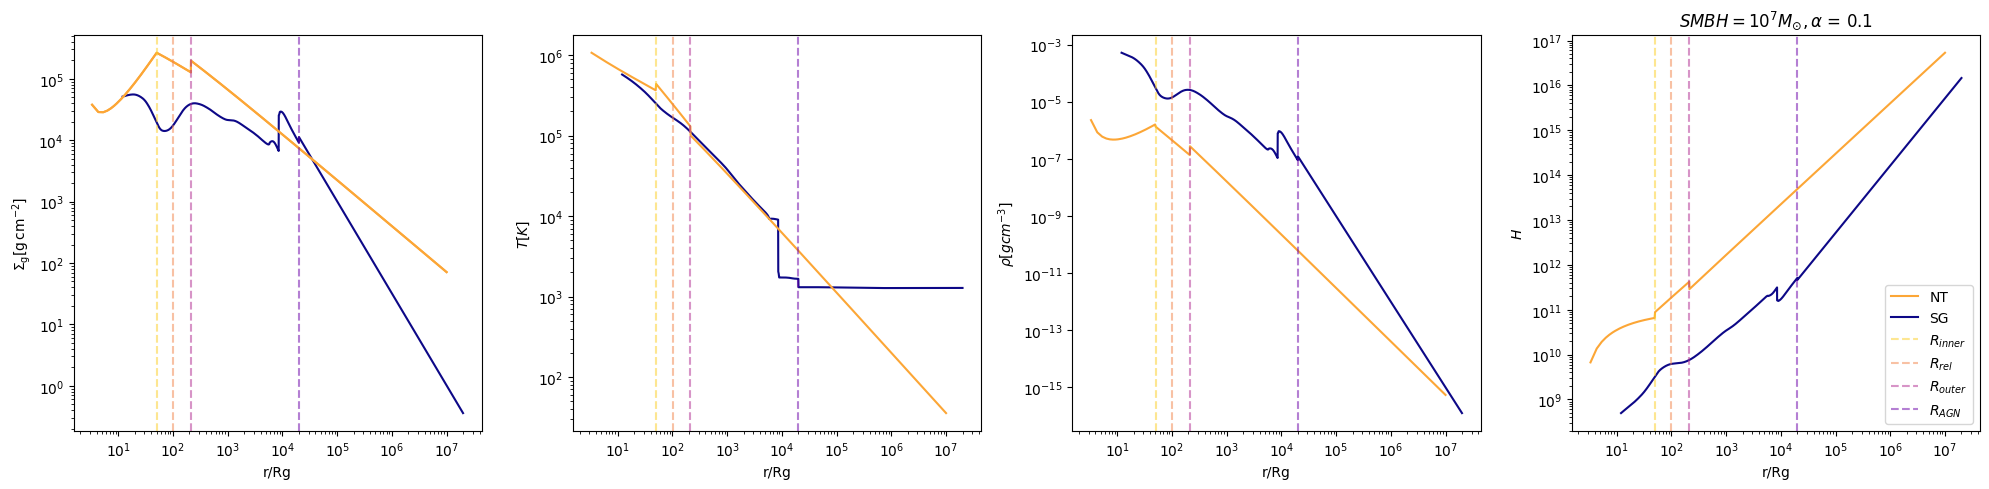

In [71]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5), dpi=100)

colour='plasma'
cmap = plt.colormaps[colour]

i=0

axs[i].plot(disk.R/R_G, 2*disk.h*disk.rho*ct.SI_to_gcm2, label = r"SG", color=cmap(0.0))
axs[i].plot(Rs, sigmas, '-', color=cmap(0.8), label = r"NT")

axs[i].set_ylabel(r'$\Sigma_{\rm g} [{\rm g \, cm}^{-2}]$')
axs[i].set_xlabel("r/Rg")

axs[i].set_xscale('log')
axs[i].set_yscale('log')

axs[i].plot(Rs, sigmas, '-', color=cmap(0.8), label = r"NT")

axs[i].axvline(x=R_im, linestyle='--', color=cmap(0.9), alpha=0.5, label = r"$R_{inner}$")
axs[i].axvline(x=r_rel/R_G, linestyle='--', color=cmap(0.7), alpha=0.5, label = r"$R_{rel}$")
axs[i].axvline(x=R_mo, linestyle='--', color=cmap(0.4), alpha=0.5, label = r"$R_{outer}$")
axs[i].axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

i=1

axs[i].plot(disk.R/R_G, disk.T, color=cmap(0.0), label = r"SG")
axs[i].set_ylabel(r'$T [K] $')
axs[i].set_xlabel("r/Rg")

axs[i].set_xscale('log')
axs[i].set_yscale('log')

axs[i].plot(Rs, Ts, '-', color=cmap(0.8), label = r"NT")

axs[i].axvline(x=R_im, linestyle='--', color=cmap(0.9), alpha=0.5, label = r"$R_{inner}$")
axs[i].axvline(x=r_rel/R_G, linestyle='--', color=cmap(0.7), alpha=0.5, label = r"$R_{rel}$")
axs[i].axvline(x=R_mo, linestyle='--', color=cmap(0.4), alpha=0.5, label = r"$R_{outer}$")
axs[i].axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

i=2

axs[i].plot(disk.R/R_G, disk.rho, color=cmap(0.0), label = r"SG")
axs[i].set_ylabel(r'$\rho [gcm^{-3}] $')
axs[i].set_xlabel("r/Rg")

axs[i].set_xscale('log')
axs[i].set_yscale('log')

axs[i].plot(Rs, rho0s, '-', color=cmap(0.8), label = r"NT")

axs[i].axvline(x=R_im, linestyle='--', color=cmap(0.9), alpha=0.5, label = r"$R_{inner}$")
axs[i].axvline(x=r_rel/R_G, linestyle='--', color=cmap(0.7), alpha=0.5, label = r"$R_{rel}$")
axs[i].axvline(x=R_mo, linestyle='--', color=cmap(0.4), alpha=0.5, label = r"$R_{outer}$")
axs[i].axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

i=3

axs[i].set_ylabel(r'$H$')
axs[i].set_xlabel("r/Rg")

axs[i].set_xscale('log')
axs[i].set_yscale('log')

axs[i].plot(Rs, Hs, '-', color=cmap(0.8), label = r"NT")

axs[i].plot(disk.R/R_G, disk.h, '-', color=cmap(0.0), label = r"SG")

axs[i].axvline(x=R_im, linestyle='--', color=cmap(0.9), alpha=0.5, label = r"$R_{inner}$")
axs[i].axvline(x=r_rel/R_G, linestyle='--', color=cmap(0.7), alpha=0.5, label = r"$R_{rel}$")
axs[i].axvline(x=R_mo, linestyle='--', color=cmap(0.4), alpha=0.5, label = r"$R_{outer}$")
axs[i].axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

axs[i].legend()

plt.title(f'$SMBH = 10^{MBH_power}'r'{M_{\odot}}, \alpha$ = 'f'{alpha}')
plt.tight_layout()
plt.savefig(f'EMRIs_Jupiter_2/all_profiles_logMBH{MBH_power}_alpha{alpha}.pdf')
plt.show()

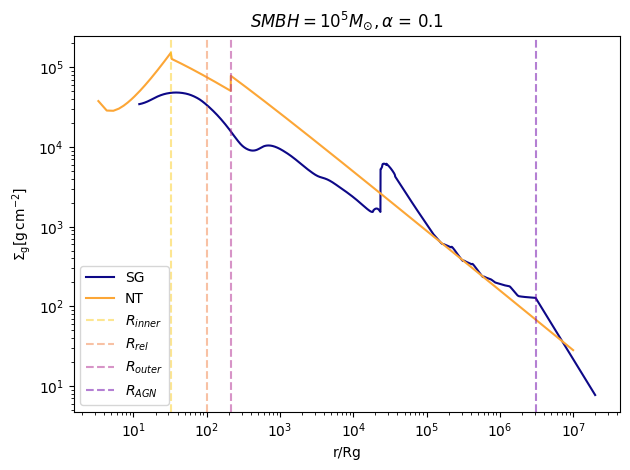

In [18]:
colour='plasma'
cmap = plt.colormaps[colour]

plt.plot(disk.R/R_G, 2*disk.h*disk.rho*ct.SI_to_gcm2, label = r"SG", color=cmap(0.0))
plt.ylabel(r'$\Sigma_{\rm g} [{\rm g \, cm}^{-2}]$')
plt.xlabel("r/Rg")

plt.xscale('log')
plt.yscale('log')

plt.plot(Rs, sigmas, '-', color=cmap(0.8), label = r"NT")
# plt.plot(Rs_mid, sigmas_mid, '-', color=cmap(0.8), label = r"NT, Mid")
# plt.plot(Rs_outer, sigmas_outer, '-', color=cmap(0.6), label = r"NT, Outer")

plt.axvline(x=R_im, linestyle='--', color=cmap(0.9), alpha=0.5, label = r"$R_{inner}$")
plt.axvline(x=r_rel/R_G, linestyle='--', color=cmap(0.7), alpha=0.5, label = r"$R_{rel}$")
plt.axvline(x=R_mo, linestyle='--', color=cmap(0.4), alpha=0.5, label = r"$R_{outer}$")
plt.axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")


plt.legend()

plt.title(f'$SMBH = 10^{MBH_power}'r'{M_{\odot}}, \alpha$ = 'f'{alpha}')

plt.tight_layout()
plt.savefig(f'EMRIs_Jupiter_2/NT_vs_SG_SD_profiles_logMBH{MBH_power}_alpha{alpha}_3.pdf')
plt.show()

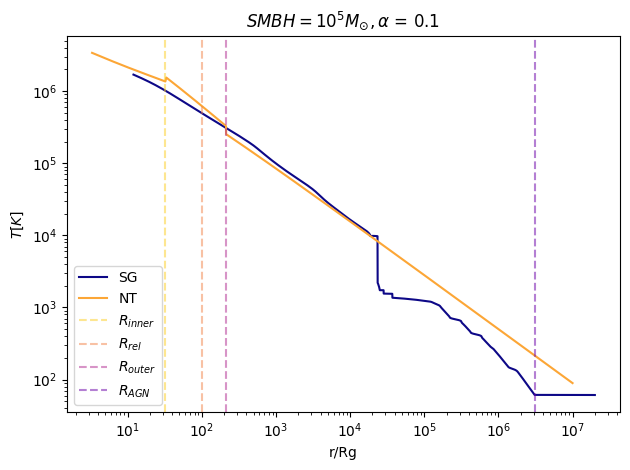

In [19]:

plt.plot(disk.R/R_G, disk.T, color=cmap(0.0), label = r"SG")
plt.ylabel(r'$T [K] $')
plt.xlabel("r/Rg")

plt.xscale('log')
plt.yscale('log')

plt.plot(Rs, Ts, '-', color=cmap(0.8), label = r"NT")
# plt.plot(Rs_mid, Ts_mid, '-', color=cmap(0.8), label = r"NT, Mid")
# plt.plot(Rs_outer, Ts_outer, '-', color=cmap(0.6), label = r"NT, Outer")

plt.axvline(x=R_im, linestyle='--', color=cmap(0.9), alpha=0.5, label = r"$R_{inner}$")
plt.axvline(x=r_rel/R_G, linestyle='--', color=cmap(0.7), alpha=0.5, label = r"$R_{rel}$")
plt.axvline(x=R_mo, linestyle='--', color=cmap(0.4), alpha=0.5, label = r"$R_{outer}$")
plt.axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

plt.title(f'$SMBH = 10^{MBH_power}'r'{M_{\odot}}, \alpha$ = 'f'{alpha}')
plt.legend()
plt.tight_layout()
plt.savefig(f'EMRIs_Jupiter_2/NT_vs_SG_T_profiles_logMBH{MBH_power}_alpha{alpha}_2.pdf')
plt.show()

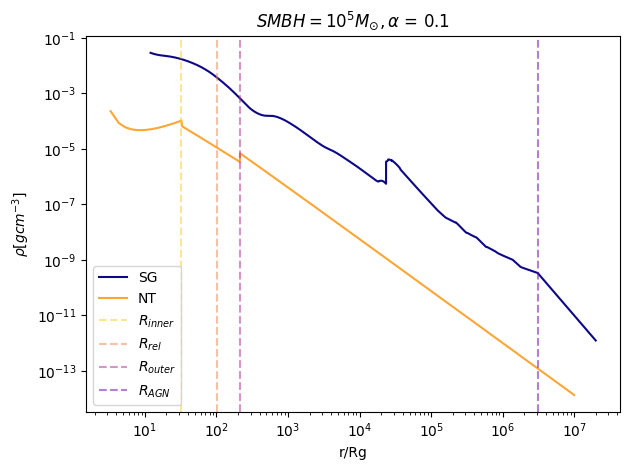

In [20]:

plt.plot(disk.R/R_G, disk.rho, color=cmap(0.0), label = r"SG")
plt.ylabel(r'$\rho [gcm^{-3}] $')
plt.xlabel("r/Rg")

plt.xscale('log')
plt.yscale('log')

plt.plot(Rs, rho0s, '-', color=cmap(0.8), label = r"NT")
# plt.plot(Rs_mid, Ts_mid, '-', color=cmap(0.8), label = r"NT, Mid")
# plt.plot(Rs_outer, Ts_outer, '-', color=cmap(0.6), label = r"NT, Outer")

plt.axvline(x=R_im, linestyle='--', color=cmap(0.9), alpha=0.5, label = r"$R_{inner}$")
plt.axvline(x=r_rel/R_G, linestyle='--', color=cmap(0.7), alpha=0.5, label = r"$R_{rel}$")
plt.axvline(x=R_mo, linestyle='--', color=cmap(0.4), alpha=0.5, label = r"$R_{outer}$")
plt.axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

plt.title(f'$SMBH = 10^{MBH_power}'r'{M_{\odot}}, \alpha$ = 'f'{alpha}')
plt.legend()
plt.tight_layout()
plt.savefig(f'EMRIs_Jupiter_2/NT_vs_SG_rho_profiles_logMBH{MBH_power}_alpha{alpha}_2.pdf')
plt.show()

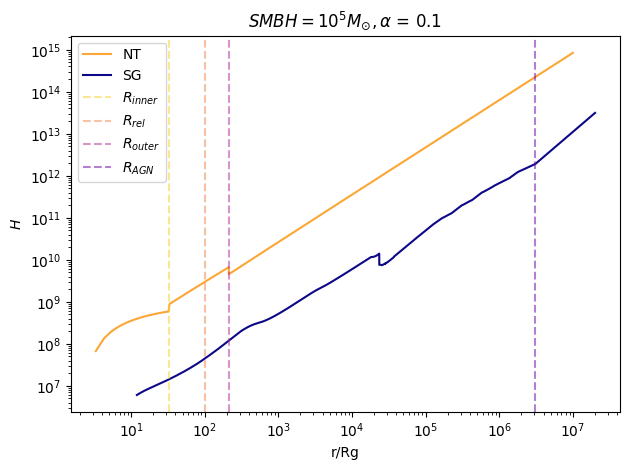

In [21]:

plt.ylabel(r'$H$')
plt.xlabel("r/Rg")

plt.xscale('log')
plt.yscale('log')

plt.plot(Rs, Hs, '-', color=cmap(0.8), label = r"NT")

plt.plot(disk.R/R_G, disk.h, '-', color=cmap(0.0), label = r"SG")

plt.axvline(x=R_im, linestyle='--', color=cmap(0.9), alpha=0.5, label = r"$R_{inner}$")
plt.axvline(x=r_rel/R_G, linestyle='--', color=cmap(0.7), alpha=0.5, label = r"$R_{rel}$")
plt.axvline(x=R_mo, linestyle='--', color=cmap(0.4), alpha=0.5, label = r"$R_{outer}$")
plt.axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

plt.title(f'$SMBH = 10^{MBH_power}'r'{M_{\odot}}, \alpha$ = 'f'{alpha}')
plt.legend()
plt.tight_layout()
plt.savefig(f'EMRIs_Jupiter_2/NT_vs_SG_H_profiles_logMBH{MBH_power}_alpha{alpha}.pdf')
plt.show()

In [10]:
disk = pagn.SirkoAGN(Mbh=MBH, alpha=alpha, le= le, eps=eps)
Rmin = disk.Rmin
Rmax = disk.Rmax
disk.solve_disk()

### Sirko & Goodman 2003 parameters ###
Mbh = 1.000000e+06 MSun
Mdot = 2.596689e-04 MSun/yr
le = 0.01
Rs = 9.570121e-08 pc
Rmin = 2.500000e+00 Rs
Rmax = 1.000000e+07 Rs, 9.570121e-01 pc
alpha = 0.1
b = 0
eps = 0.1
X = 0.7
Opacity = combined

debug = False
xtol = 1e-10
root method = lm
Q<1 at i=7386 (R=2.37e+05 Rs)
Beginning star formation at index 7386
Mdisk = 83180.73756592847 Msun
Mdisk/Mbh = 0.08318073756592848


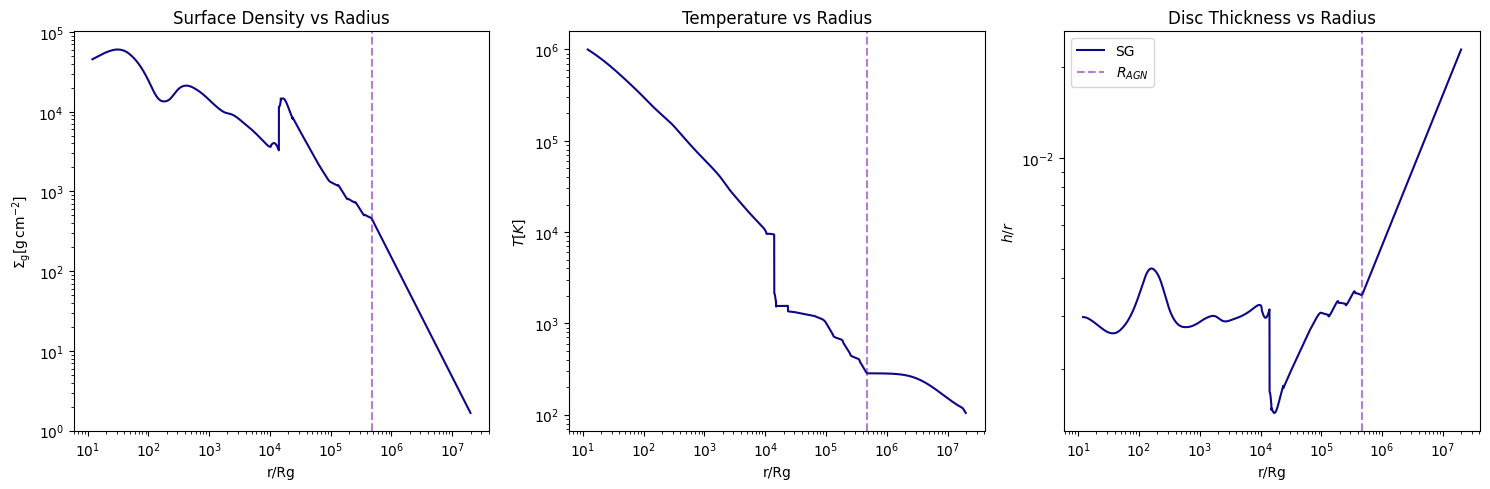

In [19]:
colour='plasma'
cmap = plt.colormaps[colour]

fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=100)

i=0
axs[i].plot(disk.R/R_G, 2*disk.h*disk.rho*ct.SI_to_gcm2, label = r"SG", color=cmap(0.0))
axs[i].set_ylabel(r'$\Sigma_{\rm g} [{\rm g \, cm}^{-2}]$')
axs[i].set_xlabel("r/Rg")

# axs[i].set_xlim(5, 1e6)
# axs[i].set_ylim(1, 1e7)
axs[i].set_xscale('log')
axs[i].set_yscale('log')
axs[i].axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

axs[i].set_title(f'Surface Density vs Radius')

i=1
axs[i].plot(disk.R/R_G, disk.T, color=cmap(0.0), label = r"SG")
axs[i].set_ylabel(r'$T [K] $')
axs[i].set_xlabel("r/Rg")

axs[i].set_xscale('log')
axs[i].set_yscale('log')

# axs[i].set_xlim(5, 1e7)
# axs[i].set_ylim(1e1, 3e7)
axs[i].axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

axs[i].set_title(f'Temperature vs Radius')

i=2

axs[i].plot(disk.R/R_G, disk.h/disk.R, label = r"SG", color=cmap(0.0))
axs[i].set_ylabel(r'$h/r$')
axs[i].set_xlabel("r/Rg")

# axs[i].set_xlim(1, 1e7)
# axs[i].set_ylim(1, 1e7)
axs[i].set_xscale('log')
axs[i].set_yscale('log')
axs[i].axvline(x=disk.R_AGN/R_G, linestyle='--', color=cmap(0.2), alpha=0.5, label = r"$R_{AGN}$")

axs[i].set_title(f'Disc Thickness vs Radius')
axs[i].legend()

plt.tight_layout()
plt.savefig(f'EMRIs_Jupiter_2/SG_profiles_logMBH{MBH_power}_alpha{alpha}_2.pdf')
plt.show()

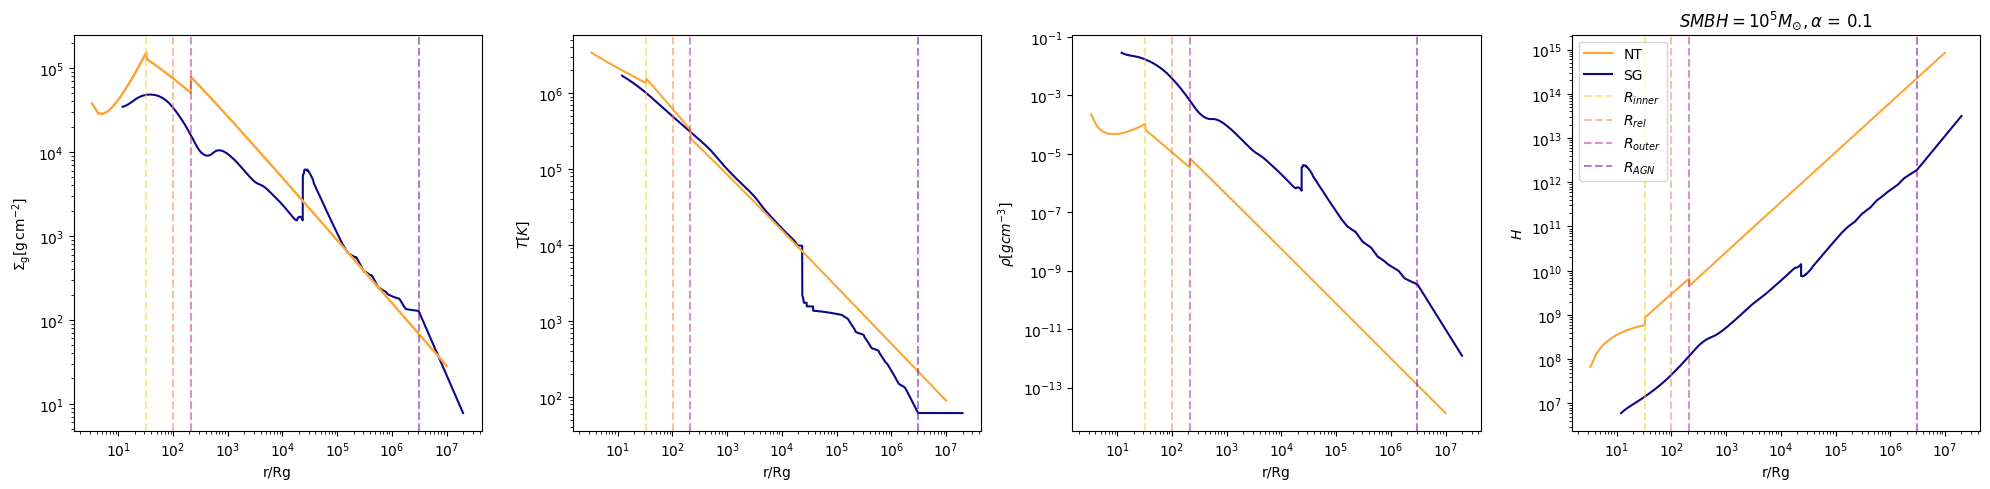